## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  23.364080  1427.263552  0.541634  5.508304  1.621108
1  61.265505  1741.533713  0.855672  6.531337  1.609125
2  35.322800  1508.288101  0.546640  8.684093  1.505744
3  68.915395   575.008278  0.883948  7.217413  1.544102
4  76.336424   286.533243  0.889923  1.645644  1.241216


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.18106 | train_mse: 4.57127 | train_mae: 1.49114 |  0:00:00s
epoch 1  | loss: 1.11282 | train_mse: 4.08486 | train_mae: 1.44557 |  0:00:00s
epoch 2  | loss: 1.08943 | train_mse: 3.2579  | train_mae: 1.27921 |  0:00:00s


epoch 3  | loss: 1.08425 | train_mse: 2.19462 | train_mae: 1.06298 |  0:00:00s
epoch 4  | loss: 0.84707 | train_mse: 1.8774  | train_mae: 0.99715 |  0:00:00s
epoch 5  | loss: 0.79139 | train_mse: 1.65746 | train_mae: 0.9363  |  0:00:00s


epoch 6  | loss: 0.84066 | train_mse: 1.42257 | train_mae: 0.87871 |  0:00:00s
epoch 7  | loss: 0.82596 | train_mse: 1.29672 | train_mae: 0.84803 |  0:00:01s


epoch 8  | loss: 0.73672 | train_mse: 1.21252 | train_mae: 0.82698 |  0:00:01s
epoch 9  | loss: 0.59011 | train_mse: 1.11084 | train_mae: 0.80107 |  0:00:01s


epoch 10 | loss: 0.7684  | train_mse: 1.0336  | train_mae: 0.76839 |  0:00:01s
epoch 11 | loss: 0.49628 | train_mse: 0.96787 | train_mae: 0.7409  |  0:00:01s


epoch 12 | loss: 0.58763 | train_mse: 0.89405 | train_mae: 0.7112  |  0:00:01s
epoch 13 | loss: 0.56197 | train_mse: 0.81542 | train_mae: 0.68367 |  0:00:01s


epoch 14 | loss: 0.45717 | train_mse: 0.74316 | train_mae: 0.65733 |  0:00:02s
epoch 15 | loss: 0.50607 | train_mse: 0.66991 | train_mae: 0.62853 |  0:00:02s


epoch 16 | loss: 0.53411 | train_mse: 0.62393 | train_mae: 0.60522 |  0:00:02s
epoch 17 | loss: 0.58442 | train_mse: 0.59199 | train_mae: 0.58996 |  0:00:02s


epoch 18 | loss: 0.54064 | train_mse: 0.57269 | train_mae: 0.58395 |  0:00:02s
epoch 19 | loss: 0.38388 | train_mse: 0.55367 | train_mae: 0.575   |  0:00:02s


epoch 20 | loss: 0.50068 | train_mse: 0.54751 | train_mae: 0.56987 |  0:00:02s
epoch 21 | loss: 0.46845 | train_mse: 0.52804 | train_mae: 0.55296 |  0:00:02s


epoch 22 | loss: 0.53586 | train_mse: 0.50761 | train_mae: 0.53627 |  0:00:03s
epoch 23 | loss: 0.33978 | train_mse: 0.48334 | train_mae: 0.52462 |  0:00:03s


epoch 24 | loss: 0.3639  | train_mse: 0.45648 | train_mae: 0.51111 |  0:00:03s
epoch 25 | loss: 0.37904 | train_mse: 0.42623 | train_mae: 0.49322 |  0:00:03s


epoch 26 | loss: 0.42246 | train_mse: 0.40383 | train_mae: 0.47955 |  0:00:03s
epoch 27 | loss: 0.33236 | train_mse: 0.38397 | train_mae: 0.4679  |  0:00:03s


epoch 28 | loss: 0.50357 | train_mse: 0.36469 | train_mae: 0.45825 |  0:00:03s
epoch 29 | loss: 0.3693  | train_mse: 0.34814 | train_mae: 0.44837 |  0:00:03s


epoch 30 | loss: 0.41598 | train_mse: 0.33626 | train_mae: 0.44135 |  0:00:04s
epoch 31 | loss: 0.28654 | train_mse: 0.32533 | train_mae: 0.43292 |  0:00:04s


epoch 32 | loss: 0.50461 | train_mse: 0.31546 | train_mae: 0.42745 |  0:00:04s
epoch 33 | loss: 0.33221 | train_mse: 0.31833 | train_mae: 0.43028 |  0:00:04s


epoch 34 | loss: 0.40027 | train_mse: 0.3288  | train_mae: 0.43788 |  0:00:04s
epoch 35 | loss: 0.33076 | train_mse: 0.32773 | train_mae: 0.43457 |  0:00:04s


epoch 36 | loss: 0.30361 | train_mse: 0.32484 | train_mae: 0.43065 |  0:00:04s
epoch 37 | loss: 0.34019 | train_mse: 0.30987 | train_mae: 0.41909 |  0:00:05s
epoch 38 | loss: 0.43978 | train_mse: 0.29117 | train_mae: 0.4058  |  0:00:05s


epoch 39 | loss: 0.30381 | train_mse: 0.27773 | train_mae: 0.40226 |  0:00:05s
epoch 40 | loss: 0.39279 | train_mse: 0.27276 | train_mae: 0.40417 |  0:00:05s
epoch 41 | loss: 0.28108 | train_mse: 0.26325 | train_mae: 0.39854 |  0:00:05s


epoch 42 | loss: 0.38808 | train_mse: 0.2573  | train_mae: 0.39514 |  0:00:05s
epoch 43 | loss: 0.50259 | train_mse: 0.25416 | train_mae: 0.3917  |  0:00:05s
epoch 44 | loss: 0.31081 | train_mse: 0.24855 | train_mae: 0.38576 |  0:00:05s


epoch 45 | loss: 0.34597 | train_mse: 0.24648 | train_mae: 0.38357 |  0:00:05s
epoch 46 | loss: 0.30588 | train_mse: 0.24065 | train_mae: 0.3782  |  0:00:05s
epoch 47 | loss: 0.21736 | train_mse: 0.23478 | train_mae: 0.37251 |  0:00:05s


epoch 48 | loss: 0.25455 | train_mse: 0.22601 | train_mae: 0.36336 |  0:00:06s
epoch 49 | loss: 0.26276 | train_mse: 0.21754 | train_mae: 0.35595 |  0:00:06s


epoch 50 | loss: 0.33504 | train_mse: 0.2127  | train_mae: 0.35758 |  0:00:06s
epoch 51 | loss: 0.30977 | train_mse: 0.20715 | train_mae: 0.35221 |  0:00:06s
epoch 52 | loss: 0.21192 | train_mse: 0.21215 | train_mae: 0.35802 |  0:00:06s


epoch 53 | loss: 0.30196 | train_mse: 0.20472 | train_mae: 0.35106 |  0:00:06s
epoch 54 | loss: 0.34639 | train_mse: 0.19231 | train_mae: 0.33866 |  0:00:06s
epoch 55 | loss: 0.29511 | train_mse: 0.18099 | train_mae: 0.3258  |  0:00:06s


epoch 56 | loss: 0.30859 | train_mse: 0.17414 | train_mae: 0.31898 |  0:00:06s


epoch 57 | loss: 0.24447 | train_mse: 0.16548 | train_mae: 0.30973 |  0:00:07s
epoch 58 | loss: 0.29892 | train_mse: 0.16328 | train_mae: 0.30652 |  0:00:07s


epoch 59 | loss: 0.24127 | train_mse: 0.15885 | train_mae: 0.30329 |  0:00:07s
epoch 60 | loss: 0.25565 | train_mse: 0.15585 | train_mae: 0.3011  |  0:00:07s
epoch 61 | loss: 0.25982 | train_mse: 0.15013 | train_mae: 0.30278 |  0:00:07s


epoch 62 | loss: 0.18958 | train_mse: 0.14877 | train_mae: 0.30293 |  0:00:07s
epoch 63 | loss: 0.19397 | train_mse: 0.14265 | train_mae: 0.3001  |  0:00:07s
epoch 64 | loss: 0.28857 | train_mse: 0.1339  | train_mae: 0.29229 |  0:00:07s


epoch 65 | loss: 0.23197 | train_mse: 0.12051 | train_mae: 0.28087 |  0:00:08s
epoch 66 | loss: 0.29375 | train_mse: 0.11768 | train_mae: 0.27907 |  0:00:08s
epoch 67 | loss: 0.15656 | train_mse: 0.11492 | train_mae: 0.27678 |  0:00:08s


epoch 68 | loss: 0.22187 | train_mse: 0.11988 | train_mae: 0.28476 |  0:00:08s
epoch 69 | loss: 0.26192 | train_mse: 0.1196  | train_mae: 0.28487 |  0:00:08s
epoch 70 | loss: 0.25744 | train_mse: 0.11392 | train_mae: 0.27839 |  0:00:08s


epoch 71 | loss: 0.23674 | train_mse: 0.10927 | train_mae: 0.27218 |  0:00:08s
epoch 72 | loss: 0.18627 | train_mse: 0.10573 | train_mae: 0.2703  |  0:00:08s
epoch 73 | loss: 0.32941 | train_mse: 0.10297 | train_mae: 0.26897 |  0:00:08s


epoch 74 | loss: 0.17831 | train_mse: 0.10499 | train_mae: 0.27226 |  0:00:08s
epoch 75 | loss: 0.31551 | train_mse: 0.10614 | train_mae: 0.27417 |  0:00:08s
epoch 76 | loss: 0.26556 | train_mse: 0.10739 | train_mae: 0.27644 |  0:00:09s


epoch 77 | loss: 0.19446 | train_mse: 0.10823 | train_mae: 0.27501 |  0:00:09s
epoch 78 | loss: 0.19849 | train_mse: 0.11499 | train_mae: 0.28202 |  0:00:09s
epoch 79 | loss: 0.22496 | train_mse: 0.12071 | train_mae: 0.28818 |  0:00:09s


epoch 80 | loss: 0.18169 | train_mse: 0.1154  | train_mae: 0.28278 |  0:00:09s
epoch 81 | loss: 0.14219 | train_mse: 0.11432 | train_mae: 0.28103 |  0:00:09s
epoch 82 | loss: 0.15153 | train_mse: 0.11098 | train_mae: 0.27746 |  0:00:09s


epoch 83 | loss: 0.16377 | train_mse: 0.10867 | train_mae: 0.27624 |  0:00:09s
epoch 84 | loss: 0.13903 | train_mse: 0.11272 | train_mae: 0.27832 |  0:00:09s
epoch 85 | loss: 0.28478 | train_mse: 0.11056 | train_mae: 0.27843 |  0:00:09s


epoch 86 | loss: 0.22923 | train_mse: 0.11226 | train_mae: 0.28149 |  0:00:09s
epoch 87 | loss: 0.16089 | train_mse: 0.11323 | train_mae: 0.28276 |  0:00:10s
epoch 88 | loss: 0.20571 | train_mse: 0.11573 | train_mae: 0.28269 |  0:00:10s


epoch 89 | loss: 0.11151 | train_mse: 0.11143 | train_mae: 0.27633 |  0:00:10s
epoch 90 | loss: 0.14846 | train_mse: 0.11022 | train_mae: 0.27492 |  0:00:10s
epoch 91 | loss: 0.14191 | train_mse: 0.10741 | train_mae: 0.2724  |  0:00:10s


epoch 92 | loss: 0.20217 | train_mse: 0.10468 | train_mae: 0.2705  |  0:00:10s
epoch 93 | loss: 0.18853 | train_mse: 0.10032 | train_mae: 0.26544 |  0:00:10s


epoch 94 | loss: 0.21631 | train_mse: 0.0974  | train_mae: 0.26276 |  0:00:10s
epoch 95 | loss: 0.1889  | train_mse: 0.0945  | train_mae: 0.26062 |  0:00:10s
epoch 96 | loss: 0.18853 | train_mse: 0.09385 | train_mae: 0.25934 |  0:00:10s


epoch 97 | loss: 0.1958  | train_mse: 0.09545 | train_mae: 0.26296 |  0:00:10s
epoch 98 | loss: 0.14575 | train_mse: 0.09233 | train_mae: 0.25585 |  0:00:11s
epoch 99 | loss: 0.22617 | train_mse: 0.08995 | train_mae: 0.24807 |  0:00:11s


epoch 100| loss: 0.21856 | train_mse: 0.08932 | train_mae: 0.24301 |  0:00:11s
epoch 101| loss: 0.24218 | train_mse: 0.08838 | train_mae: 0.24061 |  0:00:11s
epoch 102| loss: 0.14911 | train_mse: 0.08796 | train_mae: 0.24082 |  0:00:11s


epoch 103| loss: 0.21934 | train_mse: 0.08494 | train_mae: 0.23679 |  0:00:11s
epoch 104| loss: 0.20326 | train_mse: 0.08403 | train_mae: 0.2335  |  0:00:11s
epoch 105| loss: 0.17086 | train_mse: 0.08364 | train_mae: 0.23492 |  0:00:11s


epoch 106| loss: 0.14568 | train_mse: 0.08366 | train_mae: 0.23644 |  0:00:11s
epoch 107| loss: 0.19556 | train_mse: 0.08115 | train_mae: 0.23445 |  0:00:12s


epoch 108| loss: 0.21275 | train_mse: 0.08096 | train_mae: 0.23599 |  0:00:12s
epoch 109| loss: 0.13888 | train_mse: 0.08198 | train_mae: 0.23798 |  0:00:12s


epoch 110| loss: 0.15238 | train_mse: 0.07766 | train_mae: 0.23443 |  0:00:12s
epoch 111| loss: 0.17219 | train_mse: 0.07672 | train_mae: 0.23494 |  0:00:12s


epoch 112| loss: 0.21597 | train_mse: 0.07576 | train_mae: 0.22957 |  0:00:12s
epoch 113| loss: 0.20814 | train_mse: 0.07464 | train_mae: 0.22609 |  0:00:12s


epoch 114| loss: 0.15967 | train_mse: 0.07473 | train_mae: 0.22351 |  0:00:12s
epoch 115| loss: 0.17148 | train_mse: 0.07582 | train_mae: 0.22709 |  0:00:12s


epoch 116| loss: 0.18901 | train_mse: 0.07911 | train_mae: 0.23157 |  0:00:13s
epoch 117| loss: 0.204   | train_mse: 0.07781 | train_mae: 0.22792 |  0:00:13s


epoch 118| loss: 0.15233 | train_mse: 0.07801 | train_mae: 0.22952 |  0:00:13s
epoch 119| loss: 0.22489 | train_mse: 0.07716 | train_mae: 0.22917 |  0:00:13s


epoch 120| loss: 0.27991 | train_mse: 0.07766 | train_mae: 0.22889 |  0:00:13s
epoch 121| loss: 0.17996 | train_mse: 0.07832 | train_mae: 0.22752 |  0:00:13s


epoch 122| loss: 0.1459  | train_mse: 0.0802  | train_mae: 0.23018 |  0:00:13s
epoch 123| loss: 0.12956 | train_mse: 0.07951 | train_mae: 0.23049 |  0:00:13s


epoch 124| loss: 0.12086 | train_mse: 0.08035 | train_mae: 0.23229 |  0:00:14s
epoch 125| loss: 0.26032 | train_mse: 0.07689 | train_mae: 0.22731 |  0:00:14s


epoch 126| loss: 0.15892 | train_mse: 0.0711  | train_mae: 0.21761 |  0:00:14s
epoch 127| loss: 0.18615 | train_mse: 0.06786 | train_mae: 0.21019 |  0:00:14s


epoch 128| loss: 0.14976 | train_mse: 0.06527 | train_mae: 0.20259 |  0:00:14s
epoch 129| loss: 0.18167 | train_mse: 0.06444 | train_mae: 0.20225 |  0:00:14s


epoch 130| loss: 0.14092 | train_mse: 0.06512 | train_mae: 0.20692 |  0:00:14s
epoch 131| loss: 0.16398 | train_mse: 0.06586 | train_mae: 0.20721 |  0:00:14s


epoch 132| loss: 0.15279 | train_mse: 0.07086 | train_mae: 0.21579 |  0:00:15s
epoch 133| loss: 0.25005 | train_mse: 0.07023 | train_mae: 0.21568 |  0:00:15s


epoch 134| loss: 0.21243 | train_mse: 0.06679 | train_mae: 0.21074 |  0:00:15s


epoch 135| loss: 0.23448 | train_mse: 0.06718 | train_mae: 0.21202 |  0:00:15s
epoch 136| loss: 0.19182 | train_mse: 0.06753 | train_mae: 0.21365 |  0:00:15s


epoch 137| loss: 0.19786 | train_mse: 0.07083 | train_mae: 0.21966 |  0:00:15s
epoch 138| loss: 0.12396 | train_mse: 0.07641 | train_mae: 0.22625 |  0:00:16s
epoch 139| loss: 0.12619 | train_mse: 0.07733 | train_mae: 0.22827 |  0:00:16s


epoch 140| loss: 0.17076 | train_mse: 0.08193 | train_mae: 0.23199 |  0:00:16s
epoch 141| loss: 0.10903 | train_mse: 0.0813  | train_mae: 0.23164 |  0:00:16s
epoch 142| loss: 0.19928 | train_mse: 0.08118 | train_mae: 0.23076 |  0:00:16s


epoch 143| loss: 0.10764 | train_mse: 0.0782  | train_mae: 0.2271  |  0:00:16s
epoch 144| loss: 0.1941  | train_mse: 0.07793 | train_mae: 0.22887 |  0:00:16s
epoch 145| loss: 0.16136 | train_mse: 0.07445 | train_mae: 0.22676 |  0:00:16s


epoch 146| loss: 0.28776 | train_mse: 0.07381 | train_mae: 0.22565 |  0:00:16s
epoch 147| loss: 0.10039 | train_mse: 0.07522 | train_mae: 0.22669 |  0:00:16s
epoch 148| loss: 0.1789  | train_mse: 0.07595 | train_mae: 0.22669 |  0:00:16s


epoch 149| loss: 0.15074 | train_mse: 0.07498 | train_mae: 0.22502 |  0:00:17s
epoch 150| loss: 0.17968 | train_mse: 0.0759  | train_mae: 0.22678 |  0:00:17s
epoch 151| loss: 0.1225  | train_mse: 0.07586 | train_mae: 0.22806 |  0:00:17s


epoch 152| loss: 0.12728 | train_mse: 0.07416 | train_mae: 0.22542 |  0:00:17s
epoch 153| loss: 0.16054 | train_mse: 0.0724  | train_mae: 0.22402 |  0:00:17s
epoch 154| loss: 0.19815 | train_mse: 0.07215 | train_mae: 0.22435 |  0:00:17s


epoch 155| loss: 0.16171 | train_mse: 0.07137 | train_mae: 0.22379 |  0:00:17s
epoch 156| loss: 0.14341 | train_mse: 0.07259 | train_mae: 0.22503 |  0:00:17s
epoch 157| loss: 0.19304 | train_mse: 0.07138 | train_mae: 0.22366 |  0:00:17s


epoch 158| loss: 0.20347 | train_mse: 0.06907 | train_mae: 0.22015 |  0:00:17s
epoch 159| loss: 0.16991 | train_mse: 0.06873 | train_mae: 0.21891 |  0:00:17s
epoch 160| loss: 0.12031 | train_mse: 0.06591 | train_mae: 0.21332 |  0:00:18s


epoch 161| loss: 0.148   | train_mse: 0.06457 | train_mae: 0.21026 |  0:00:18s
epoch 162| loss: 0.15992 | train_mse: 0.0633  | train_mae: 0.20974 |  0:00:18s
epoch 163| loss: 0.19013 | train_mse: 0.06195 | train_mae: 0.20688 |  0:00:18s


epoch 164| loss: 0.31369 | train_mse: 0.06212 | train_mae: 0.20621 |  0:00:18s
epoch 165| loss: 0.12459 | train_mse: 0.06276 | train_mae: 0.20619 |  0:00:18s
epoch 166| loss: 0.29846 | train_mse: 0.06351 | train_mae: 0.2053  |  0:00:18s


epoch 167| loss: 0.13679 | train_mse: 0.06428 | train_mae: 0.20569 |  0:00:18s
epoch 168| loss: 0.13485 | train_mse: 0.06659 | train_mae: 0.20947 |  0:00:18s
epoch 169| loss: 0.22894 | train_mse: 0.06673 | train_mae: 0.21088 |  0:00:18s


epoch 170| loss: 0.1868  | train_mse: 0.06803 | train_mae: 0.2135  |  0:00:18s
epoch 171| loss: 0.09979 | train_mse: 0.06864 | train_mae: 0.21668 |  0:00:18s
epoch 172| loss: 0.09847 | train_mse: 0.06772 | train_mae: 0.2168  |  0:00:19s


epoch 173| loss: 0.16129 | train_mse: 0.0673  | train_mae: 0.2172  |  0:00:19s
epoch 174| loss: 0.1174  | train_mse: 0.0657  | train_mae: 0.21379 |  0:00:19s
epoch 175| loss: 0.19512 | train_mse: 0.06491 | train_mae: 0.21113 |  0:00:19s


epoch 176| loss: 0.17118 | train_mse: 0.06643 | train_mae: 0.21103 |  0:00:19s
epoch 177| loss: 0.12732 | train_mse: 0.06937 | train_mae: 0.21414 |  0:00:19s
epoch 178| loss: 0.3733  | train_mse: 0.06923 | train_mae: 0.21044 |  0:00:19s


epoch 179| loss: 0.20676 | train_mse: 0.07045 | train_mae: 0.2126  |  0:00:19s

Early stopping occurred at epoch 179 with best_epoch = 129 and best_train_mae = 0.20225
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.4437240420870731


ABC Pre-generator MAE 0.45314192982006124


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

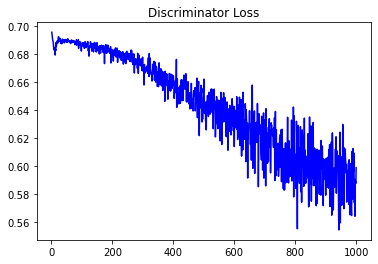

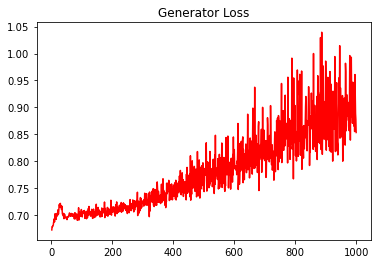

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.3084480916261673


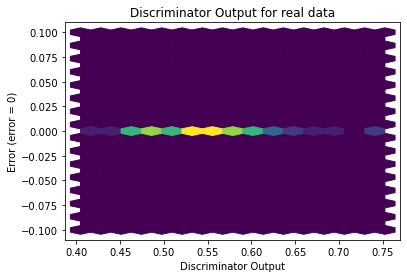

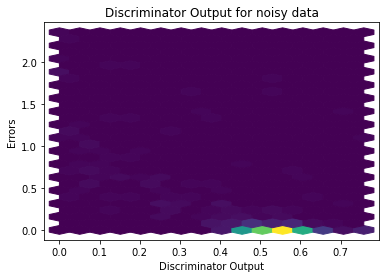

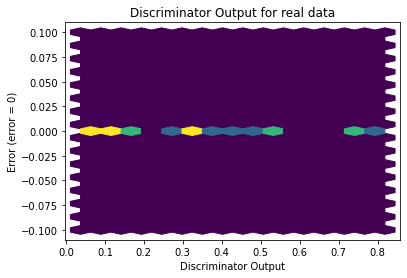

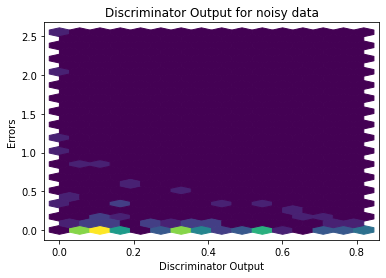

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


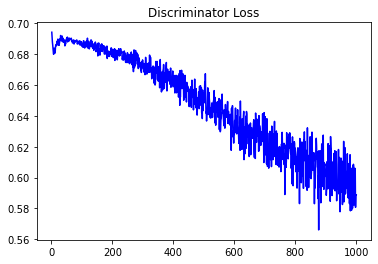

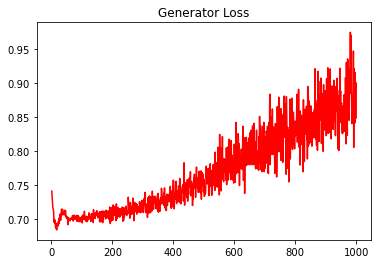

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.3543036776231602


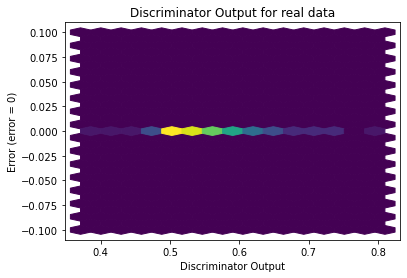

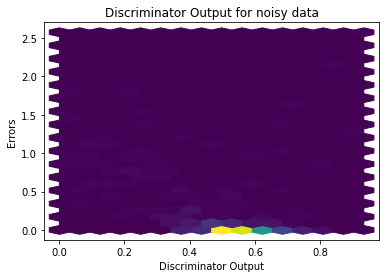

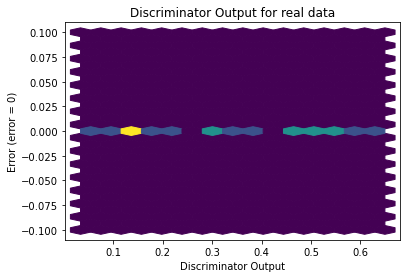

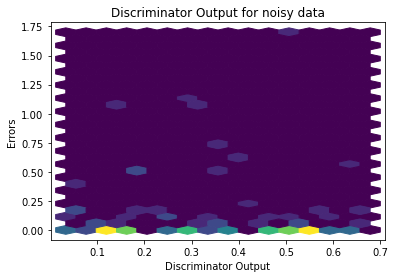

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2425]], requires_grad=True)
